# Solve Class Example using CoolProp

### Import Libraries 

In [215]:
from coolprop.CoolProp import *
from CoolProp.CoolProp import *
import numpy as np 
import matplotlib.pyplot as plt 

### Problem Statement 

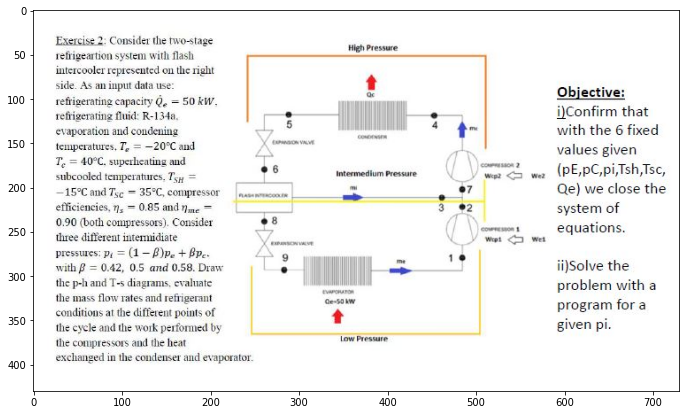

In [216]:
from matplotlib import image

img = image.imread("class_exercise.JPG")
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.imshow(img)
plt.show()

### The given Conditions 

In [217]:
Te = -20+273;                # Evaporation temperature (K)
Tc = 40+273;                 # Condensation temperature(K)
T1 = -15+273;                # superheated temperature (K)
T5 = 35+273;                 # subcooled               (K)
Qe = 50000;                  # Refreigeration Capacity (W)
eta_isen = 0.85;             # Isentropic efficiency for both compressors 
eta_me = 0.9;                # Mechanical efficiency for both compressors 
fluid='R134a';

### Finding Saturation and Intermediate Pressures
P9 and P4 are found as the saturation pressures at the evaporation and condesation temperatures 

In [218]:
P9 = PropsSI('P', 'Q', 0,'T', Te, fluid);     # P_satuation for Evapration 
P4 = PropsSI('P', 'Q', 0, 'T',Tc ,fluid);     # P_saturation for condensation 

### The Intermediate Pressure 

In [219]:
beta = 0.5;                         # assuming beta as 0.5 
P6 = (1-beta)*P9 + beta*P4;

### The other pressures 

In [220]:
P1 = P9;
P5 = P4;
P8 = P6;
P3 = P6;
P2 = P6;
P7 = P6;

### Fow the Lower Branch 
h8 is the enthalpy of saturated liquid at the intermedaite pressure <br>
h3 is the enthalpy of saturated vapor at the intermediate pressure 

In [221]:
h8 = PropsSI('H', 'Q', 0,'P', P6, fluid);     # hl at the intermediate pressure 
h3 = PropsSI('H', 'Q', 1,'P', P6, fluid);     # hg at the intermedite pressure 
h9 = h8;
h1 = PropsSI('H', 'T',T1,'P', P9, fluid);
s1 = PropsSI('S', 'T',T1,'P', P9, fluid);
m_evaporation = Qe/(h1-h9);                   # kg/s 
m8 = m_evaporation;
print("The value of h1 is",h1/1000,"kJ/kg")
print("The value of s1 is",s1/1000,"kJ/kg.K")

The value of h1 is 390.5356178871617 kJ/kg
The value of s1 is 1.7574033610026678 kJ/kg.K


### Finding h2 
First we find h2-ideal. h2-ideal is found by assuming first that compression is isentropic and using s2 = s1 and P2. Then, we use isentropic and mechanical efficiencies of the compressors to find the real h2. 

In [222]:
s2 = s1;
h2_isen = PropsSI('H', 'S',s2,'P', P2, fluid);
We1 = (m_evaporation*(h2_isen-h1))/(eta_isen*eta_me);  # wattts 
h2 = ((h2_isen - h1)/eta_isen) + h1;
print("The value of h2 is",h2/1000,"kJ/kg")

The value of h2 is 427.01040349293805 kJ/kg


### h5 and h6 
At point 5, the system of subcoold unitl 35 degree centigrade and pressure is also know, the condensation pressure, so h5 is found by using these two properties <br>
The expansion is isenthalpic between points 5 and 6. So, h6 = h5 

In [223]:
h5 = PropsSI('H','T',T5,'P',P5,fluid);
h6 = h5; 

### Energy Balance between Points 6,8 & 3
m8h8 + m3h3 = m6h6 (1)  <br>
m8 + m3 = m6 (2) <br>
Using (2) in (1)  <br>
m8h8 + m3h3 = (m8+m3)h6  <br>
m8h8 + m3h3 = m8h6 + m3h6 <br>
m3(h3-h6) = m8(h6-h8) <br>
So,  <br>
m3 = m8(h6-h8)/(h3-h6) <br>


In [224]:
m3 = (m8*(h6-h8))/(h3-h6);
m6 = m3+m8;
print("The value of m3 is",m3,"kg/s")
print("The value of m6 is",m6,"kg/s")

The value of m3 is 0.04051514439708285 kg/s
The value of m6 is 0.34720866793236643 kg/s


### Energy Balance between points 2,3 & 7
m3h3 + m2h2 = m7h7 <br>
m3 + m2 = m7 = m6 <br>
So, <br>
m3h3 + m2h2 = m6h7 <br> 
Thus, <br>
h7 = (m3h3+m2h2)/m6

In [225]:
m2 = m_evaporation;
h7 = (m3*h3+m2*h2)/m6;
print("The value of h7 is",h7/1000,"kJ/kg")

The value of h7 is 424.99781231606676 kJ/kg


The 2nd compressions is also assumed isentropic. Thus, the constant entropy and pressure is used to find h4.

In [226]:
s7 = PropsSI('S','H',h7,'P',P7,fluid);
s4 = s7;
h4 = PropsSI('H','S',s4,'P',P4,fluid);
print("The value of h4 is",h4/1000,"kJ/kg")

The value of h4 is 437.856880378327 kJ/kg


### Heats exchanged with Condensors and Compressors 

In [227]:
H_cond = m6*(h4-h5);
H_evap = m_evaporation*(h1-h9);
print('The energy absorbed by the evaporator is',H_evap/1000,'kJ')
print('The energy exchaned by the condensor is',H_cond/1000,'kJ')

The energy absorbed by the evaporator is 50.0 kJ
The energy exchaned by the condensor is 65.65136041037859 kJ


### Works by Compressors 

In [228]:
We1 = m_evaporation*(h2-h1);
We2 = m6*(h4-h7);
print('The work done by the first compressor is',We1/1000,'kJ')
print('The work done by the second compressor is',We2/1000,'kJ')

The work done by the first compressor is 11.186580517629574 kJ
The work done by the second compressor is 4.464779892749008 kJ


### Functions for Saturation Curves 

In [229]:
def Ph_Dome():
    fluid='R134a';
    Hl = np.empty(0);
    Hg = np.empty(0);
    P_curve = np.empty(0);
    for Pref in np.linspace (50000,4000000, num=800):
        L  = PropsSI('H', 'Q', 0, 'P', Pref, fluid);
        G = PropsSI('H', 'Q', 1, 'P', Pref, fluid);
        Hl = np.append(Hl,L);
        Hg = np.append(Hg,G);
        P_curve = np.append(P_curve,Pref);
    return Hl,Hg,P_curve

def Ts_Dome():
    fluid='R134a';
    sl = np.empty(0);
    sg = np.empty(0);
    T = np.empty(0);
    for Tref in np.linspace (200,373, num=800):
        L  = PropsSI('S', 'Q', 0, 'T', Tref, fluid);
        G = PropsSI('S', 'Q', 1, 'T', Tref, fluid);
        sl = np.append(sl,L);
        sg = np.append(sg,G);
        T = np.append(T,Tref);
    return sl,sg,T

### Functions for Isotherms and Isobars 

In [230]:
def isotherms():
    fluid = 'R134a';
    H_20 = np.empty(0);
    H_40 = np.empty(0);
    P_isotherm = np.empty(0);
    for Pref in np.linspace (50000,2000000, num=800):
        x20 = PropsSI('H', 'T', 253, 'P', Pref, fluid);
        y20 = PropsSI('H', 'T', 313, 'P', Pref, fluid);
        H_20 = np.append(H_20,x20);
        H_40 = np.append(H_40,y20);
        P_isotherm = np.append(P_isotherm,Pref);
    return H_20, H_40, P_isotherm 

def isobars():
    fluid='R134a';
    T_isobar_1 = np.empty(0);
    T_isobar_2 = np.empty(0);
    T_isobar_3 = np.empty(0);
    s_isobar = np.empty(0);
    for sref in np.linspace (800,1800, num=700):
        T1  = PropsSI('T', 'S', sref, 'P', P1, fluid);
        T2 = PropsSI('T', 'S', sref, 'P', P3, fluid);
        T3 = PropsSI('T', 'S', sref, 'P', P4, fluid);
        T_isobar_1 = np.append(T_isobar_1,T1);
        T_isobar_2 = np.append(T_isobar_2,T2);
        T_isobar_3 = np.append(T_isobar_3,T3);
        s_isobar = np.append(s_isobar,sref);
    return T_isobar_1,T_isobar_2,T_isobar_3,s_isobar

### Ph Plot 

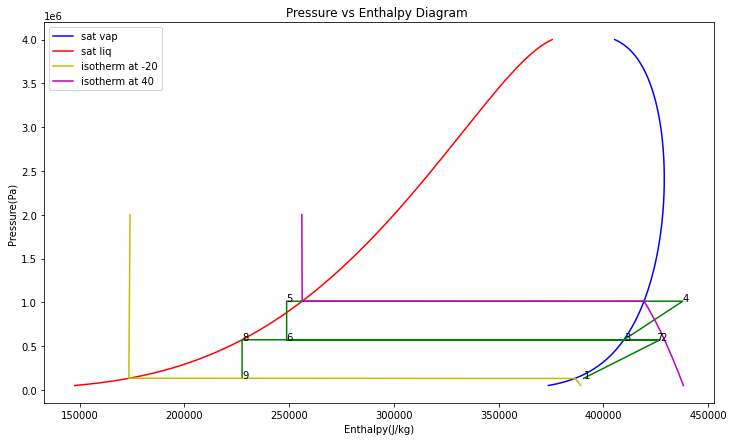

In [231]:
from cProfile import label
from turtle import color

[Hl,Hg,P_curve] = Ph_Dome()
[H_20,H_40,P_isotherm] = isotherms()

P = [P1,P2,P3,P4,P5,P6,P7,P8,P9];
h = [h1,h2,h3,h4,h5,h6,h7,h8,h9];
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.plot(Hg,P_curve, '-b',label = "sat vap")
plt.plot(Hl,P_curve, 'r',label = 'sat liq')

plt.plot(h,P,'g')
plt.plot(H_20,P_isotherm,'y',label = "isotherm at -20")
plt.plot(H_40,P_isotherm, 'm', label = "isotherm at 40")
plt.legend(loc = "upper left")
plt.annotate("1", (h1,P1))
plt.annotate("2",(h2,P2))
plt.annotate("3",(h3,P3))
plt.annotate("4",(h4,P4))
plt.annotate("5",(h5,P5))
plt.annotate("6",(h6,P6))
plt.annotate("7",(h7,P7))
plt.annotate("8",(h8,P8))
plt.annotate("9",(h9,P9))
plt.xlabel("Enthalpy(J/kg)")
plt.ylabel("Pressure(Pa)")
plt.title("Pressure vs Enthalpy Diagram ")
plt.show()

### Ts Plot

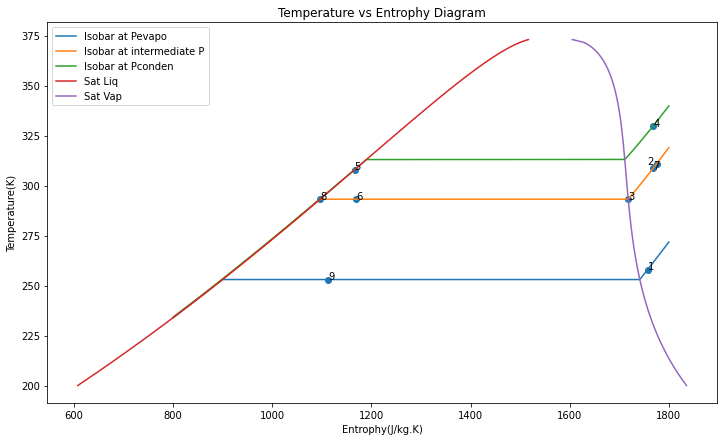

In [232]:
[sl_dome,sg_dome,T_dome] = Ts_Dome()
[T_isobar_1,T_isobar_2,T_isobar_3,s_isobar] = isobars()

T = np.zeros(9);
s = np.zeros(9);
for i in range(9):
    T[i] = PropsSI('T','H',h[i],'P',P[i],fluid)
    s[i] = PropsSI('S','H',h[i],'P',P[i],fluid)


f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.plot(s_isobar,T_isobar_1, label = "Isobar at Pevapo")
plt.plot(s_isobar,T_isobar_2, label = "Isobar at intermediate P")
plt.plot(s_isobar,T_isobar_3, label = "Isobar at Pconden")
plt.plot(sl_dome,T_dome,label = "Sat Liq")
plt.plot(sg_dome,T_dome, label = "Sat Vap")
plt.legend(loc = "upper left")
plt.scatter(s,T)
plt.annotate("1", (s1,T1))
plt.annotate("2",(s2,T[1]))
plt.annotate("3",(s[2],T[2]))
plt.annotate("4",(s4,T[3]))
plt.annotate("5",(s[4],T5))
plt.annotate("6",(s[5],T[5]))
plt.annotate("7",(s7,T[6]))
plt.annotate("8",(s[7],T[7]))
plt.annotate("9",(s[8],T[8]))
plt.xlabel("Entrophy(J/kg.K)")
plt.ylabel("Temperature(K)")
plt.title("Temperature vs Entrophy Diagram")
plt.show()